# Analysis of Q3 on the Maven Dependency Dataset (MDD)

This document is the third chapter of a set of notebooks that accompany the paper "Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central". In this chapter, we investigate Q3 and its corresponding null hypothesis on the Maven Dependency Dataset (MDD).

**Q3**: What is the impact of BCs on clients?

**H$_3$**: BCs have a significant impact in terms of compilation errors in client systems.

---

## Table of Contents
<div class="toc" style="margin-top: 1em;">
    <ul class="toc-item">
        <li>
            <span><a href="#Setup" data-toc-modified-id="Setup">Setup</a></span>
        </li>
        <li>
            <span><a href="#Datasets" data-toc-modified-id="Datasets">Datasets</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Load-Datasets" data-toc-modified-id="Load-Datasets">Load Datasets</a></span>
                </li>
                <li>
                    <span><a href="#Clean-Datasets" data-toc-modified-id="Clean-Datasets">Clean Datasets</a></span>
                </li>
                <li>
                    <span><a href="#Finalize-Datasets" data-toc-modified-id="Finalize-Datasets">Finalize Datasets</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Pre-analysis-All-Dataset" data-toc-modified-id="Pre-analysis-All-Dataset">Pre-analysis All Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Datasets-Summary" data-toc-modified-id="Datasets-Summary">Datasets Summary</a></span>
                </li>
                <li>
                    <span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics">Descriptive Statistics</a></span>
                </li>
                <li>
                    <span><a href="#Java-Versions" data-toc-modified-id="Java-Versions">Java Versions</a></span>
                </li>
                <li>
                    <span><a href="#Semantic-Versioning-Levels" data-toc-modified-id="Semantic-Versioning-Levels">Semantic Versioning Levels</a></span>
                </li>
                <li>
                    <span><a href="#Client-Release-Year" data-toc-modified-id="Client-Release-Year">Client Release Year</a></span>
                </li>
                <li>
                    <span><a href="#Detections-Density" data-toc-modified-id="Detections-Density">Detections Density</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Results" data-toc-modified-id="Results">Results</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Broken-Clients" data-toc-modified-id="Broken-Clients">Broken Clients</a></span>
                </li>
                <li>
                    <span><a href="#Number-of-Detections" data-toc-modified-id="Number-of-Detections">Number of Detections</a></span>
                </li>
                <li>
                    <span><a href="#Breaking-Change-Types" data-toc-modified-id="Breaking-Change-Types">Breaking Change Types</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Hypotheses-Testing" data-toc-modified-id="Hypotheses-Testing">Hypotheses Testing</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Usage-Ratios-and-Totals" data-toc-modified-id="Usage-Ratios-and-Totals">Usage Ratios and Totals</a></span>
                </li>
                <li>
                    <span><a href="#Usage-Summary" data-toc-modified-id="Usage-Summary">Usage Summary</a></span>
                </li>
                <li>
                    <span><a href="#Hypothesis-Tests" data-toc-modified-id="Hypothesis-Tests">Hypothesis Tests</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#EOF" data-toc-modified-id="EOF">EOF</a></span>
        </li>
    </ul>
</div>



---

## Setup

In [1]:
# Import required libraries
library(ggplot2)
library(ggthemes)
library(gridExtra)
library(rstatix)
library(effsize)

# Set theme
theme_set(theme_stata())

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Warning message:
“package ‘ggthemes’ was built under R version 3.5.2”


---

## Datasets

### Load Datasets

Our base datasets are:
  - The universe of all upgrades `upgrades.csv` ($N=35,539$)
  - The universe of all MAJOR upgrades `upgrades-major.csv` ($N=2,861$)
  - The universe of all MINOR upgrades `upgrades-minor.csv` ($N=13,444$)
  - The universe of all PATCH upgrades `upgrades-patch.csv` ($N=17,425$)
  - The universe of all DEV upgrades `upgrades-dev.csv` ($N=1,809$)

We then pick upgrades at random, with replacement, up to the sample size given by Cochran's formula ($z=0.99$, $e=0.01$, $p=0.5$), yielding five datasets on which we run the detection algorithm:

  - A sample of all upgrades detections `detections-upgrades.csv` ($N=11,310$)
  - A sample of MAJOR upgrades detections `detections-upgrades-major.csv` ($N=2,440$)
  - A sample of MINOR upgrades detections `detections-upgrades-minor.csv` ($N=7,426$)
  - A sample of PATCH upgrades detections `detections-upgrades-patch.csv` ($N=8,498$)
  - A sample of DEV upgrades detections `detections-upgrades-dev.csv` ($N=1,631$)

In [2]:
allDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
majorDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-major-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
minorDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-minor-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
patchDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-patch-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
devDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-dev-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))

cat("Sample all upgrades:", nrow(allDs), "\n")
cat("Sample MAJOR upgrades:", nrow(majorDs), "\n")
cat("Sample MINOR upgrades:", nrow(minorDs), "\n")
cat("Sample PATCH upgrades:", nrow(patchDs), "\n")
cat("Sample DEV upgrades:", nrow(devDs), "\n")

Sample all upgrades: 11310 
Sample MAJOR upgrades: 2440 
Sample MINOR upgrades: 7426 
Sample PATCH upgrades: 8498 
Sample DEV upgrades: 1631 


### Clean Datasets

In [3]:
# Removing unneeded changes
cleaning_numDetections <- function(ds) {
    ds$numDetections_original <- ds$numDetections
    
    # Removing:
    # - methodNowThrowsCheckedException
    # - classNowCheckedException
    # - fieldStaticAndOverridesStatic
    # - methodAbstractAddedInSuperclass
    # - methodAbstractAddedInImplementedInterface
    # - methodLessAccessibleThanInSuperclass
    # - fieldLessAccessibleThanInSuperclass
    # - fieldRemovedInSuperclass
    # - methodRemovedInSuperclass
    # - superclassModifiedIncompatible
    # - methodIsStaticAndOverridesNotStatic
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")
    
    numDetections <- rep(0, nrow(ds))
    for (bc in bcs) {
        numDetections <- numDetections + ds[[bc]]
    }
    
    ds$numDetections <- numDetections
    return (ds)
}


allDs <- cleaning_numDetections(allDs)
majorDs <- cleaning_numDetections(majorDs)
minorDs <- cleaning_numDetections(minorDs)
patchDs <- cleaning_numDetections(patchDs)
devDs <- cleaning_numDetections(devDs)

In [4]:
# Get broken clients
allDs$broken <- allDs$numDetections > 0
majorDs$broken <- majorDs$numDetections > 0
minorDs$broken <- minorDs$numDetections > 0
patchDs$broken <- patchDs$numDetections > 0
devDs$broken <- devDs$numDetections > 0

allBrokenDs <- subset(allDs, broken)
majorBrokenDs <- subset(majorDs, broken)
minorBrokenDs <- subset(minorDs, broken)
patchBrokenDs <- subset(patchDs, broken)
devBrokenDs <- subset(devDs, broken)

cat("Broken clients (all upgrades):", nrow(allBrokenDs), "\n")
cat("Broken clients (MAJOR upgrades):", nrow(majorBrokenDs), "\n")
cat("Broken clients (MINOR upgrades):", nrow(minorBrokenDs), "\n")
cat("Broken clients (PATCH upgrades):", nrow(patchBrokenDs), "\n")
cat("Broken clients (DEV upgrades):", nrow(devBrokenDs), "\n")

Broken clients (all upgrades): 1076 
Broken clients (MAJOR upgrades): 309 
Broken clients (MINOR upgrades): 883 
Broken clients (PATCH upgrades): 514 
Broken clients (DEV upgrades): 300 


### Finalize Datasets

In [5]:
# Add usage cases (breaking + non-breaking)
addUsedCases <- function(ds) {
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", "classNowCheckedException", "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", "methodNowThrowsCheckedException", "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

    for (bc in bcs) {
        used  <- ds[[paste(bc, "_breaking", sep="")]] + 
        ds[[paste(bc, "_nonbreaking", sep="")]]

        ds$used = used
        names(ds)[names(ds) == "used"] <- paste(bc, "_used", sep="")
    }
}
    
addUsedCases(allDs)
addUsedCases(majorDs)
addUsedCases(minorDs)
addUsedCases(patchDs)
addUsedCases(devDs)

---

## Exploratory Data Analysis (EDA)

In [6]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_hist <- function(dataset, dim, dim_label, x_label, binw=30) {
    plot <- ggplot(dataset, aes(x=dim, y=..density..)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_histogram(binwidth=30) +
        geom_vline(aes(xintercept=median(dim)), 
                   linetype="dashed",
                   size=0.6)
    
    return(plot)
}

In [7]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_bar <- function(dataset, dim, dim_label, x_label) {
    plot <- ggplot(dataset, aes(x=dim, y=..prop.., group=1)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_bar() +
        ylim(0, 1) +
        theme_light()
    
    return(plot)
}

### Pre-analysis All Dataset

In [8]:
# Do we want to study the difference between internal/external clients? => We don't have internal clients
sprintf("There are %d external clients, %d internal clients", nrow(subset(allDs, allDs$cgroup != allDs$lgroup)), nrow(subset(allDs, allDs$cgroup == allDs$lgroup)))

# Do we study the same pairs <client, library> several times? => Yes
all <- nrow(allDs)
uniqueClients <- length(unique(paste(allDs$cgroup, allDs$cartifact)))
uniqueLibs <- length(unique(paste(allDs$lgroup, allDs$lartifact)))
uniquePairs <- length(unique(paste(allDs$cgroup, allDs$cartifact, allDs$lgroup, allDs$lartifact)))
sprintf("There are %d detections, %d unique clients, %d unique libraries, %d unique pairs", all, uniqueClients, uniqueLibs, uniquePairs)

# Do we have detections (even unused) for all BCs? => No
# Nothing for superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass (normal for the two first, but there are some fieldLessAccessibleThanInSuperclass in RQ1 so that's weird)
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", "classNowCheckedException", "classLessAccessible", "superclassRemoved", "superclassAdded", "superclassModifiedIncompatible", "interfaceAdded", "interfaceRemoved", "methodRemoved", "methodRemovedInSuperclass", "methodLessAccessible", "methodLessAccessibleThanInSuperclass", "methodMoreAccessible", "methodIsStaticAndOverridesNotStatic", "methodReturnTypeChanged", "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", "methodNowThrowsCheckedException", "methodAbstractAddedToClass", "methodAbstractAddedInSuperclass", "methodAbstractAddedInImplementedInterface", "methodNewDefault", "methodAbstractNowDefault", "fieldStaticAndOverridesStatic", "fieldLessAccessibleThanInSuperclass", "fieldNowFinal", "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldRemovedInSuperclass", "fieldLessAccessible", "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")
for (bc in bcs) {
    allDetections <- sum(allDs[[bc]])
    unusedDetections <- sum(allDs[[paste(bc, "_unused", sep="")]])
    if (allDetections == 0 && unusedDetections == 0)
        print(sprintf("There are 0 detections and 0 unused detections for %s. It's not part of the dataset?", bc))
}

[1] "There are 8227 external clients, 3083 internal clients"

[1] "There are 11310 detections, 5859 unique clients, 1006 unique libraries, 8812 unique pairs"

[1] "There are 0 detections and 0 unused detections for superclassModifiedIncompatible. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodLessAccessibleThanInSuperclass. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodIsStaticAndOverridesNotStatic. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodNewDefault. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodAbstractNowDefault. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for fieldLessAccessibleThanInSuperclass. It's not part of the dataset?"


### Datasets Summary

In [9]:
summary(allDs)

    cgroup           cartifact              cv                cyear     
 Length:11310       Length:11310       Length:11310       2010   :2311  
 Class :character   Class :character   Class :character   2011   :1728  
 Mode  :character   Mode  :character   Mode  :character   2009   :1719  
                                                          2008   :1431  
                                                          2007   : 773  
                                                          2012   : 684  
                                                          (Other):2664  
    lgroup           lartifact             lv1                lv2           
 Length:11310       Length:11310       Length:11310       Length:11310      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [10]:
summary(majorDs)

    cgroup           cartifact              cv                cyear    
 Length:2440        Length:2440        Length:2440        2011   :403  
 Class :character   Class :character   Class :character   2010   :380  
 Mode  :character   Mode  :character   Mode  :character   2009   :279  
                                                          2012   :266  
                                                          2018   :229  
                                                          2015   :194  
                                                          (Other):689  
    lgroup           lartifact             lv1                lv2           
 Length:2440        Length:2440        Length:2440        Length:2440       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

In [11]:
summary(minorDs)

    cgroup           cartifact              cv                cyear     
 Length:7426        Length:7426        Length:7426        2010   :1554  
 Class :character   Class :character   Class :character   2011   :1359  
 Mode  :character   Mode  :character   Mode  :character   2009   : 928  
                                                          2008   : 749  
                                                          2012   : 627  
                                                          2013   : 361  
                                                          (Other):1848  
    lgroup           lartifact             lv1                lv2           
 Length:7426        Length:7426        Length:7426        Length:7426       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [12]:
summary(patchDs)

    cgroup           cartifact              cv                cyear     
 Length:8498        Length:8498        Length:8498        2010   :1764  
 Class :character   Class :character   Class :character   2009   :1519  
 Mode  :character   Mode  :character   Mode  :character   2008   :1277  
                                                          2011   :1128  
                                                          2007   : 854  
                                                          2012   : 382  
                                                          (Other):1574  
    lgroup           lartifact             lv1                lv2           
 Length:8498        Length:8498        Length:8498        Length:8498       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [13]:
summary(devDs)

    cgroup           cartifact              cv                cyear    
 Length:1631        Length:1631        Length:1631        2010   :412  
 Class :character   Class :character   Class :character   2009   :281  
 Mode  :character   Mode  :character   Mode  :character   2008   :275  
                                                          2011   :251  
                                                          2007   :109  
                                                          2013   : 92  
                                                          (Other):211  
    lgroup           lartifact             lv1                lv2           
 Length:1631        Length:1631        Length:1631        Length:1631       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

### Descriptive Statistics

In [14]:
summary(allDs$declarations)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      65     225    1990     936  586010 

In [15]:
summary(allDs$api_declarations)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      41     155    1472     681  561407 

### Java Versions

Saving 7 x 7 in image



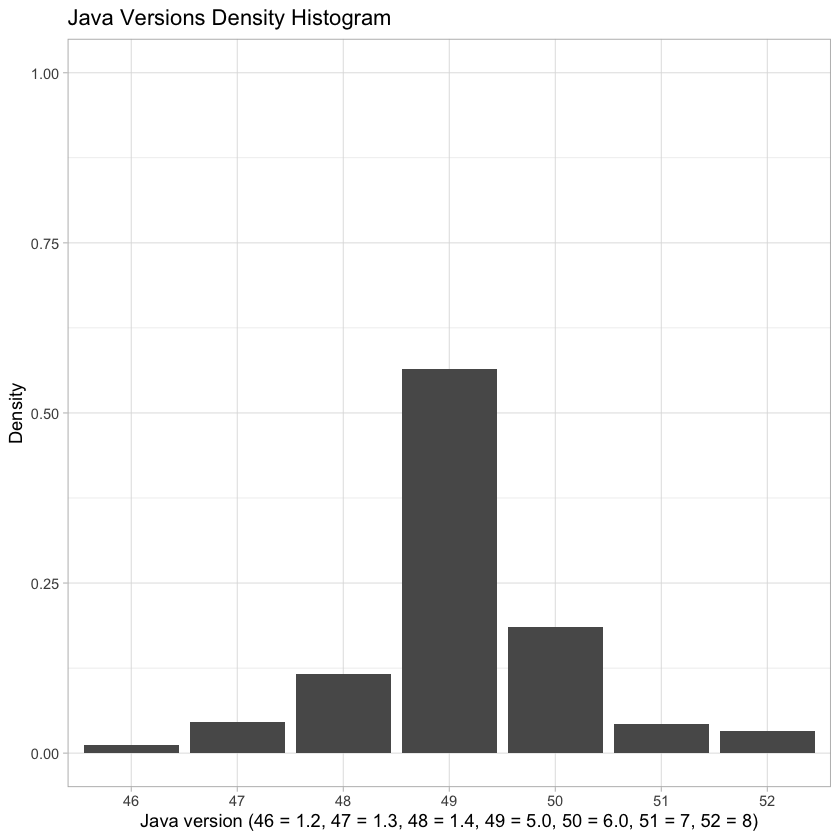

In [16]:
# 46 = 1.2, 47 = 1.3, 48 = 1.4, 49 = 5.0, 50 = 6.0, 51 = 7, 52 = 8, 53 = 9, 54 = 10, 196653 = 1.1
p <- plot_dens_bar(allDs, allDs$java_version, "Java Versions", "Java version (46 = 1.2, 47 = 1.3, 48 = 1.4, 49 = 5.0, 50 = 6.0, 51 = 7, 52 = 8)")

p
ggsave("figures/mdd-client-java-versions.pdf", p)

### Semantic Versioning Levels

Saving 7 x 7 in image



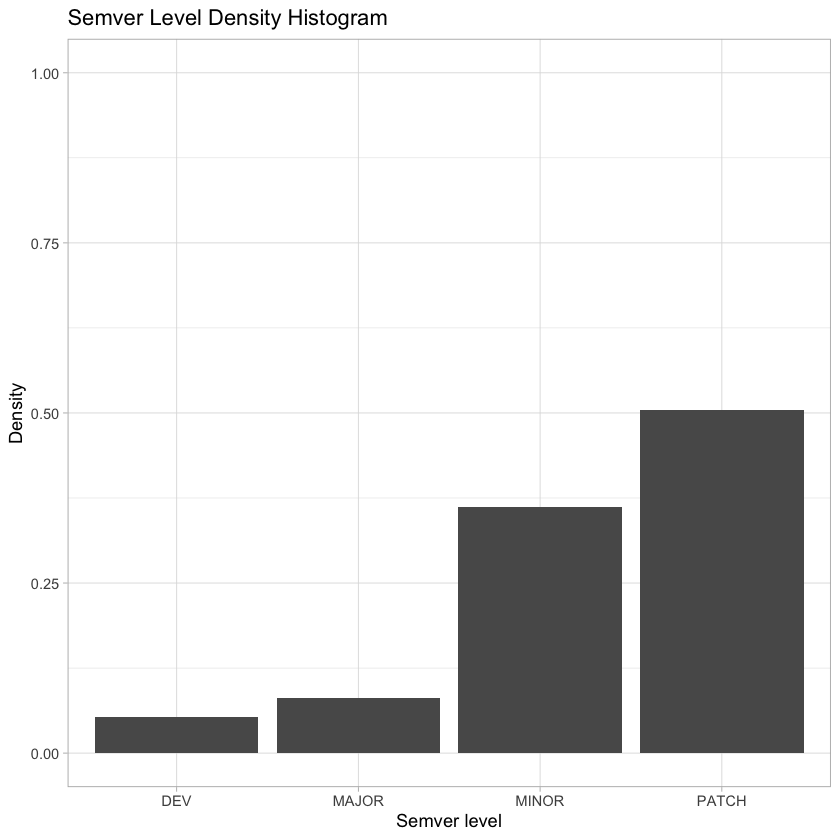

In [17]:
p <- plot_dens_bar(allDs, allDs$level, "Semver Level", "Semver level")

p
ggsave("figures/mdd-client-semver-levels.pdf", p)

### Client Release Year

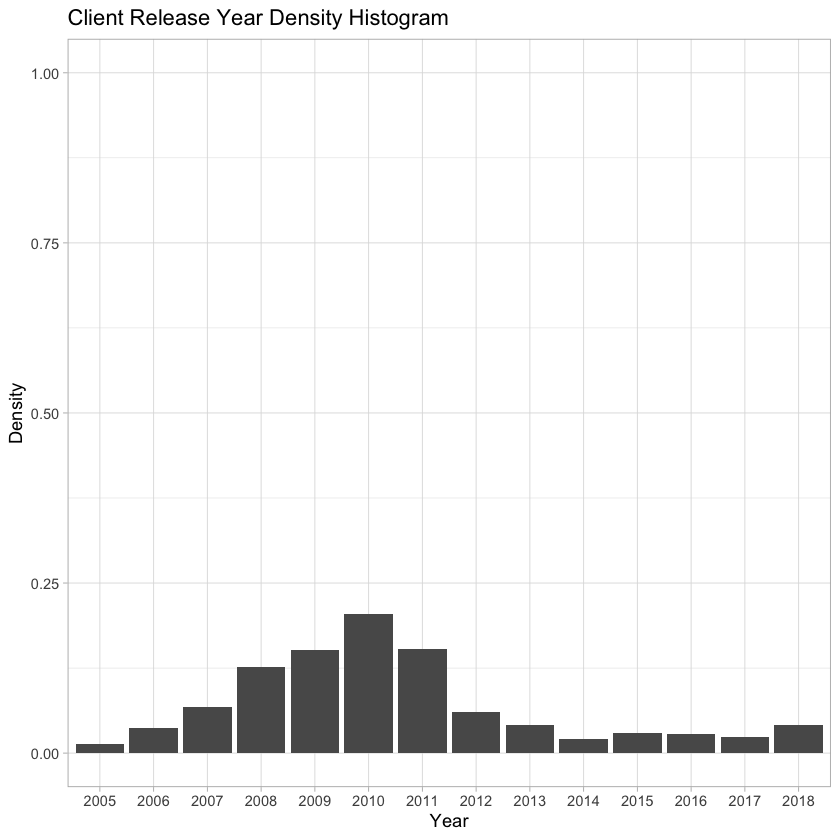

In [18]:
plot_dens_bar(allDs, allDs$cyear, "Client Release Year", "Year")

### Detections Density

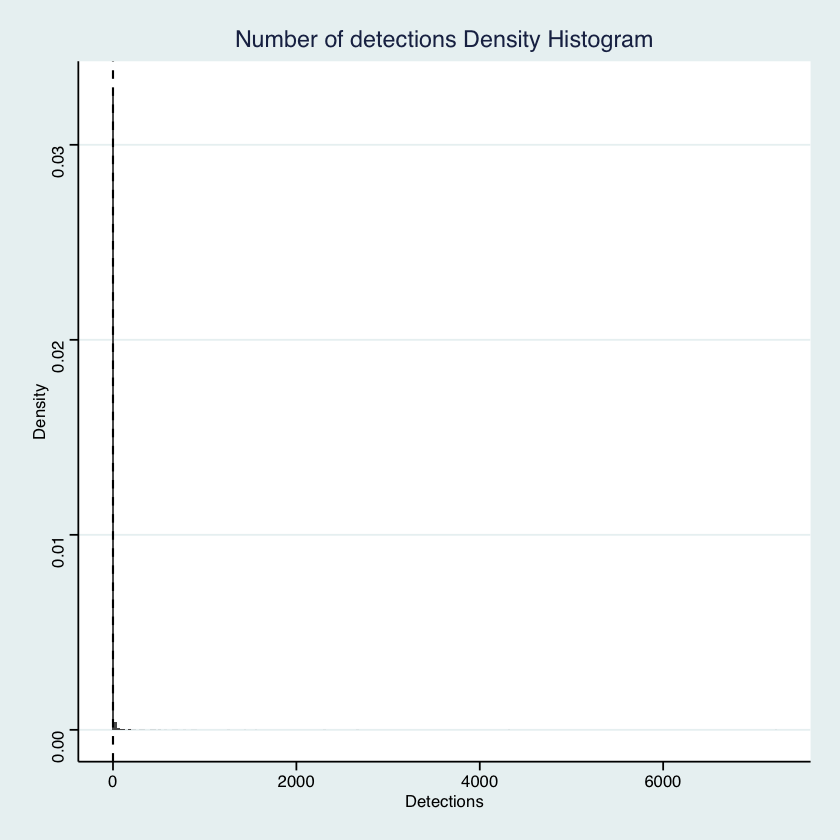

In [19]:
p <- plot_dens_hist(allDs, allDs$numDetections, "Number of detections", "Detections")
p

---

## Results

### Broken Clients

In [20]:
# Create broken clients data frame
breaking_upgrades <- data.frame(
    level = c("ALL", "MAJOR", "MINOR", "PATCH", "DEV"),
    number = c(nrow(allDs), nrow(majorDs), nrow(minorDs), nrow(patchDs), nrow(devDs)),
    broken = c(nrow(allBrokenDs),
               nrow(majorBrokenDs),
               nrow(minorBrokenDs),
               nrow(patchBrokenDs),
               nrow(devBrokenDs)),
    broken_ratio = c(nrow(allBrokenDs) / nrow(allDs),
                     nrow(majorBrokenDs) / nrow(majorDs),
                     nrow(minorBrokenDs) / nrow(minorDs),
                     nrow(patchBrokenDs) / nrow(patchDs),
                     nrow(devBrokenDs) / nrow(devDs)),
    detections = c(median(allBrokenDs$numDetections),
                   median(majorBrokenDs$numDetections),
                   median(minorBrokenDs$numDetections),
                   median(patchBrokenDs$numDetections),
                   median(devBrokenDs$numDetections))
)

breaking_upgrades

level,number,broken,broken_ratio,detections
<fct>,<int>,<int>,<dbl>,<dbl>
ALL,11310,1076,0.09513705,4
MAJOR,2440,309,0.12663934,5
MINOR,7426,883,0.11890654,4
PATCH,8498,514,0.06048482,3
DEV,1631,300,0.18393624,6


In [21]:
dt <- subset(allDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   40.05   12.00 7243.00 

In [22]:
dt <- subset(majorDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    5.00   41.75   15.00 2861.00 

In [23]:
dt <- subset(minorDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   26.66   11.00 2812.00 

In [24]:
dt <- subset(patchDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00   39.79   11.00 4309.00 

In [25]:
dt <- subset(devDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    6.00   34.47   17.25 1433.00 

Saving 7 x 7 in image



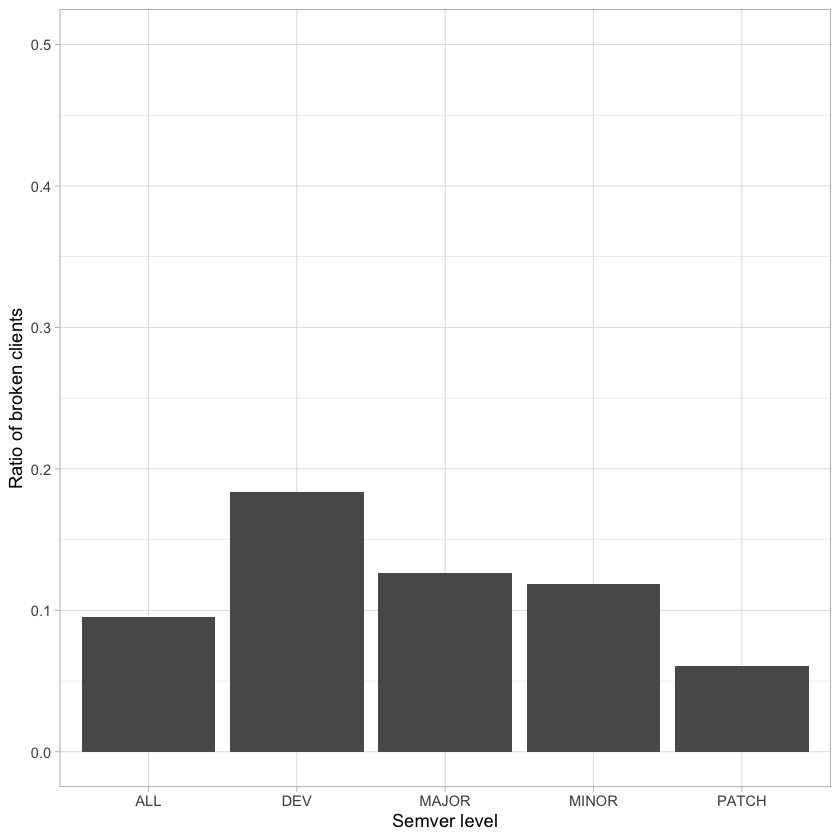

In [26]:
# Ratio of broken clients per semver level
p <- ggplot(breaking_upgrades, aes(x=level, y=broken_ratio)) +
        labs(x="Semver level", y="Ratio of broken clients") +
        geom_bar(stat="identity") +
        ylim(0, 0.5) +
        theme_light()

p
ggsave("figures/mdd-broken_ratio.pdf", p)

### Number of Detections

In [27]:
# Compute median value
med_fun <- function(x) {
    return (data.frame(y=median(x), label = round(10^median(x), digits=2)))
}

# Compute first quantile value
fstq_fun <- function(x) {
    return (data.frame(y=quantile(x)[2], label = round(10^(quantile(x)[2]), digits=2)))
}

# Compute third quantile value
thrq_fun <- function(x) {
    return (data.frame(y=quantile(x)[4], label = round(10^(quantile(x)[4]), digits=2)))
}

In [28]:
# Create dataset with number of detections per client per semver level
dt <- subset(allDs, numDetections > 0)

semver_dt <- data.frame(level=rep('MAJOR', nrow(subset(majorDs, numDetections > 0))), 
                    numDetections=subset(majorDs, numDetections > 0)$numDetections)

minor <- data.frame(level=rep('MINOR', nrow(subset(minorDs, numDetections > 0))), 
                    numDetections=subset(minorDs, numDetections > 0)$numDetections)

patch <- data.frame(level=rep('PATCH', nrow(subset(patchDs, numDetections > 0))), 
                    numDetections=subset(patchDs, numDetections > 0)$numDetections)

dev <- data.frame(level=rep('DEV', nrow(subset(devDs, numDetections > 0))), 
                    numDetections=subset(devDs, numDetections > 0)$numDetections)

semver_dt <- rbind(semver_dt, minor)
semver_dt <- rbind(semver_dt, patch)
semver_dt <- rbind(semver_dt, dev)

semver_dt$level <- factor(semver_dt$level, levels=c("MAJOR", "MINOR", "PATCH", "DEV"))

Saving 7 x 7 in image



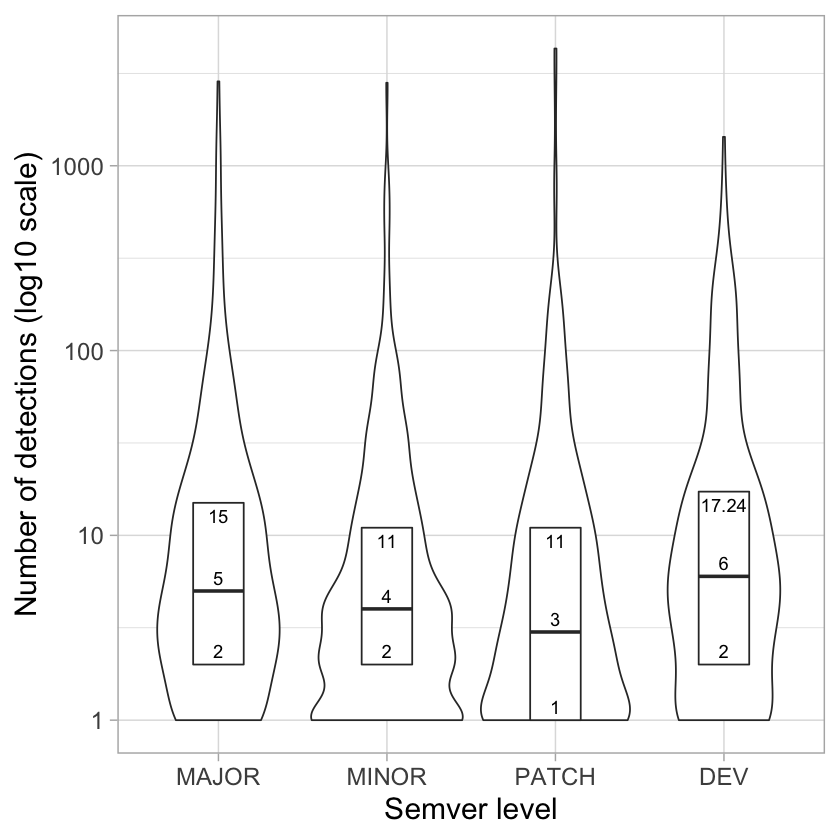

In [29]:
# Number of detections per broken client per semver level
p <- ggplot(semver_dt, aes(x=level, y=numDetections)) +
    labs(x="Semver level", y="Number of detections (log10 scale)") +
    geom_violin() +
    geom_boxplot(width=0.3, outlier.shape = NA, coef=0) +
    stat_summary(fun.data = med_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = fstq_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = thrq_fun, geom = "text", vjust=+1.5) +
    scale_y_continuous(trans="log10") +
    theme_light(base_size=18)

p
ggsave("figures/mdd-detections-number.pdf", p)

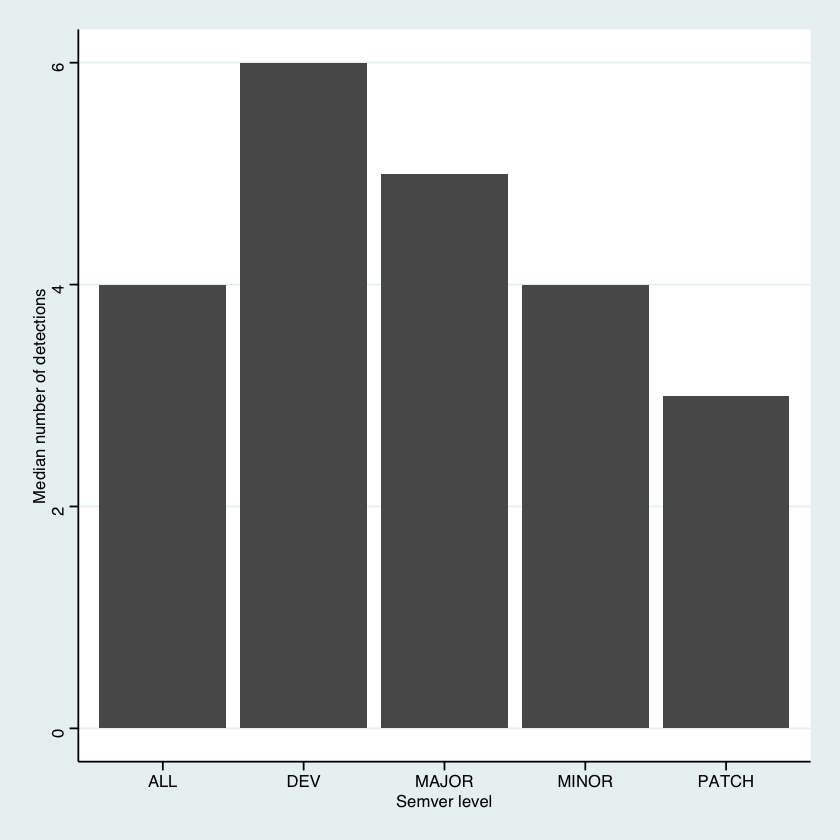

In [30]:
# Median number of detections per semver level
p <- ggplot(breaking_upgrades, aes(x = level, y = detections)) +
    labs(x="Semver level", y="Median number of detections") +
        geom_bar(stat="identity")

p

In [31]:
# Print number of detections per type of usage
print_detections <- function(name, ds) {
    # Split dataset, ignoring annotationDeprecatedAdded and methodAddedToPublicClass
    detectionsAll      <- ds[c(19:42, 44:61)]     # One detection = one occurence of a change breaking something in client code
    detectionsStable   <- ds[c(67:90, 92:109)]    #   => where the change comes from the stable part of the API
    detectionsUnstable <- ds[c(115:138, 140:157)] #   =>                                 unstable
    changed            <- ds[c(159:182, 184:201)] # Number of breaking changes in the current delta
    usageBreaking      <- ds[c(203:226, 228:245)] #   => those that break at least one location in client code
    usageNonBreaking   <- ds[c(247:270, 272:289)] #   => those that do not break any location even though they're used
    usageUnused        <- ds[c(291:314, 316:333)] #   => those that are not used

    sprintf("[%s] All: %d Stable: %d Unstable: %d Changed: %d Breaking: %d Non-breaking: %d Unused: %d",
            name,
            sum(rowSums(detectionsAll)),
            sum(rowSums(detectionsStable)),
            sum(rowSums(detectionsUnstable)),
            sum(rowSums(changed)),
            sum(rowSums(usageBreaking)),
            sum(rowSums(usageNonBreaking)),
            sum(rowSums(usageUnused)))
}

print_detections("ALL", allDs)
print_detections("MAJOR", majorDs)
print_detections("MINOR", minorDs)
print_detections("PATCH", patchDs)
print_detections("DEV", devDs)

[1] "[ALL] All: 44972 Stable: 44352 Unstable: 620 Changed: 789278 Breaking: 10348 Non-breaking: 5234 Unused: 775054"

[1] "[MAJOR] All: 12918 Stable: 12776 Unstable: 142 Changed: 488560 Breaking: 3091 Non-breaking: 2445 Unused: 483162"

[1] "[MINOR] All: 24000 Stable: 23723 Unstable: 277 Changed: 596293 Breaking: 6797 Non-breaking: 4127 Unused: 586952"

[1] "[PATCH] All: 20528 Stable: 20288 Unstable: 240 Changed: 315534 Breaking: 5070 Non-breaking: 2243 Unused: 308797"

[1] "[DEV] All: 12715 Stable: 12600 Unstable: 115 Changed: 176130 Breaking: 3034 Non-breaking: 1345 Unused: 172021"

### Breaking Change Types

[1] "methodNewDefault"
[1] "methodAbstractNowDefault"


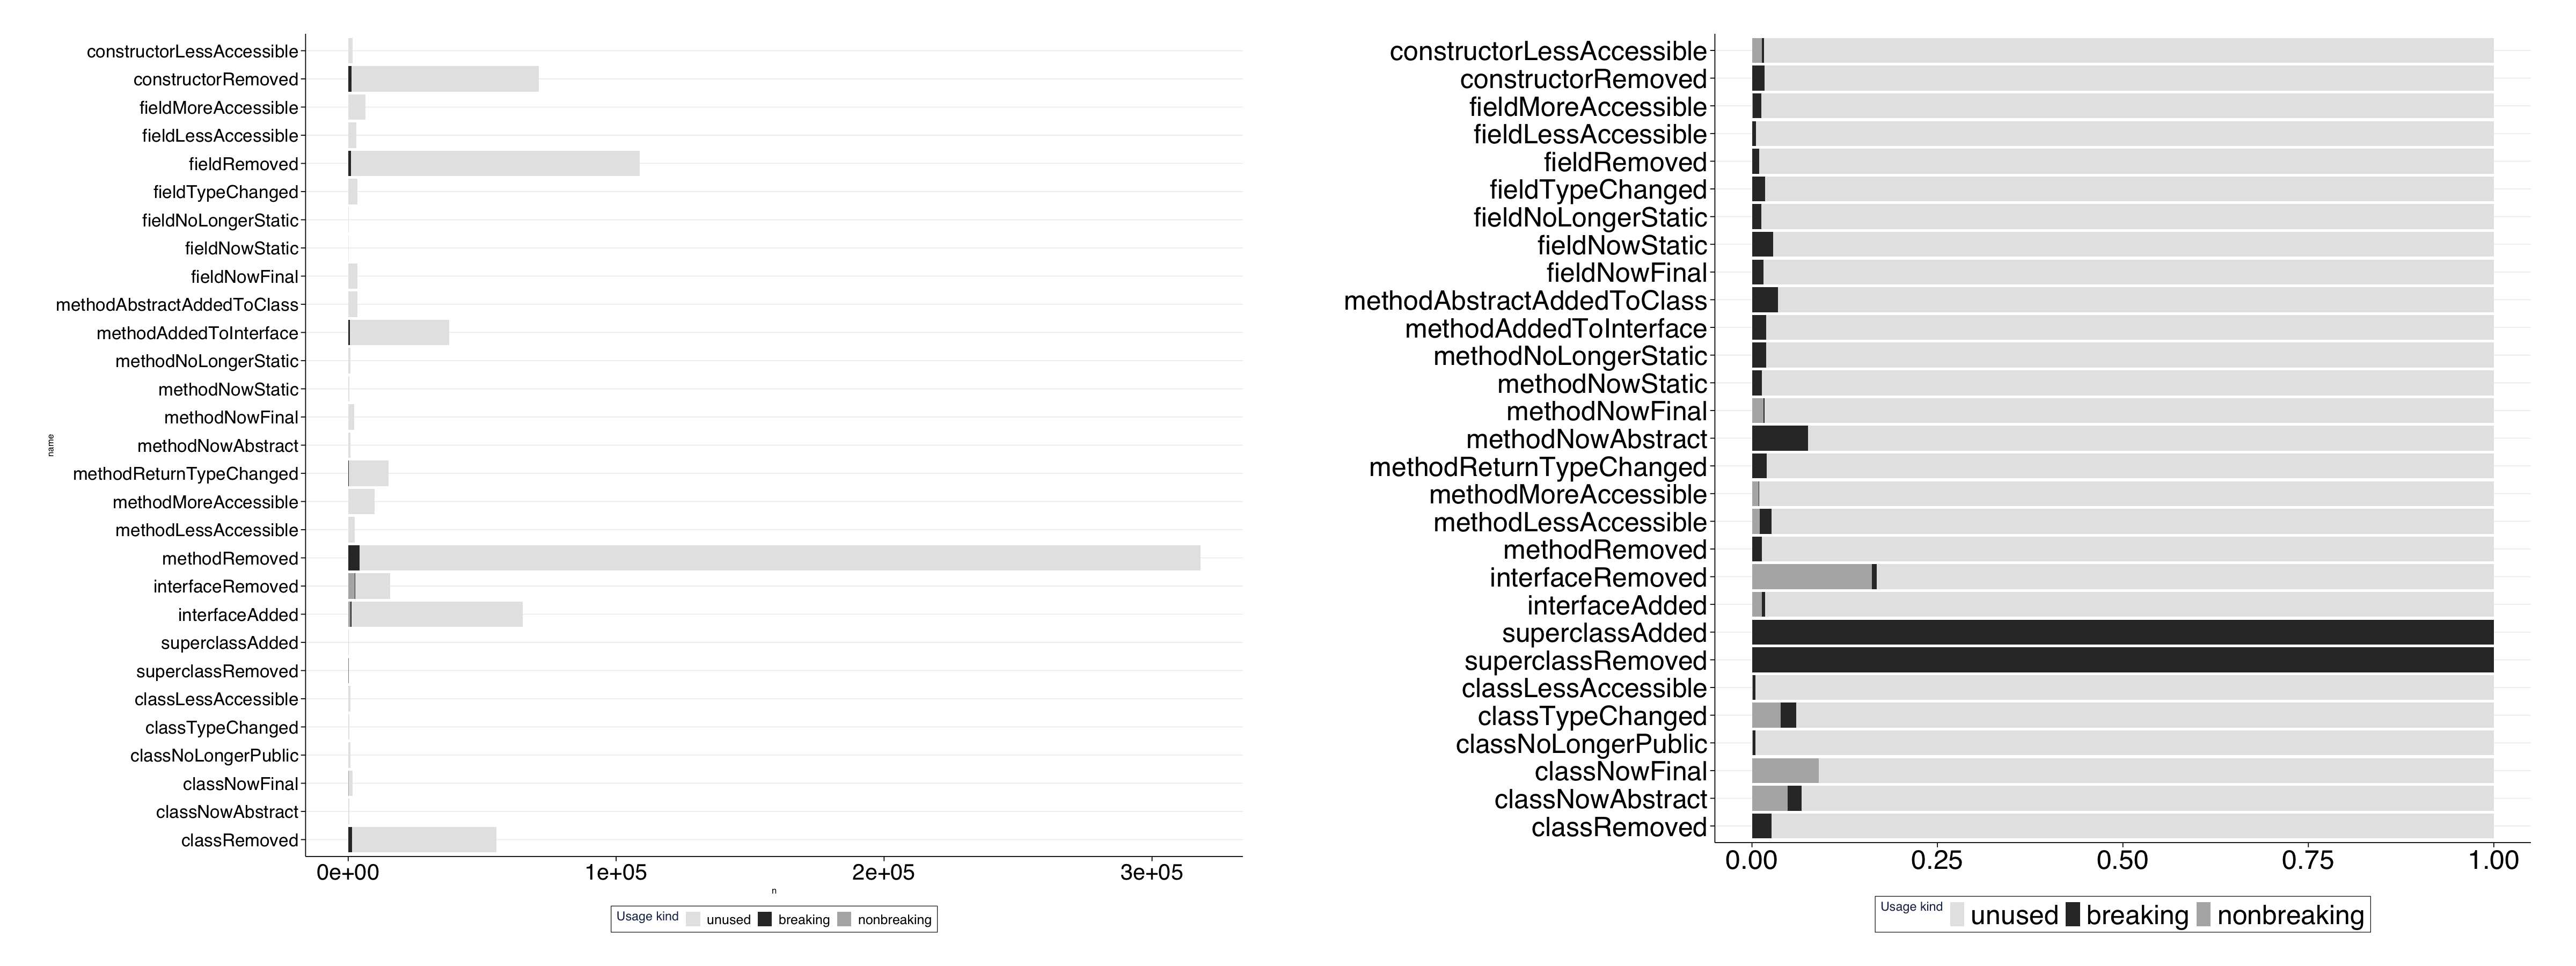

In [32]:
# Computing stats per BC type for all use types

# Removing:
# - methodNowThrowsCheckedException
# - classNowCheckedException
# - fieldStaticAndOverridesStatic
# - methodAbstractAddedInSuperclass
# - methodAbstractAddedInImplementedInterface
# - methodLessAccessibleThanInSuperclass
# - fieldLessAccessibleThanInSuperclass
# - fieldRemovedInSuperclass
# - methodRemovedInSuperclass
# - superclassModifiedIncompatible
# - methodIsStaticAndOverridesNotStatic
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

barstats <- data.frame(
    name = factor(),
    type = factor(),
    n = numeric()
)

for (bc in bcs) {
    t  <- sum(allDs[[paste(bc, "", sep="")]])
    s  <- sum(allDs[[paste(bc, "_stable", sep="")]])
    un <- sum(allDs[[paste(bc, "_unstable", sep="")]])
    u  <- sum(allDs[[paste(bc, "_unused", sep="")]])
    b  <- sum(allDs[[paste(bc, "_breaking", sep="")]])
    nb <- sum(allDs[[paste(bc, "_nonbreaking", sep="")]])
    c  <- sum(allDs[[paste(bc, "_changed", sep="")]])

    if (u + b + nb > 0) { # superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass should be filtered out
        barstats <- rbind(barstats, data.frame(name = bc, type = "unused", n = u))
        barstats <- rbind(barstats, data.frame(name = bc, type = "breaking", n = b))
        barstats <- rbind(barstats, data.frame(name = bc, type = "nonbreaking", n = nb))
    } else { print(sprintf("%s",bc)) }
    
    nChanged <- nrow(subset(allDs, allDs[[paste(bc, "_changed", sep="")]] > 0))
    nBroken  <- nrow(subset(allDs, allDs[[paste(bc, "_breaking", sep="")]] > 0))
}

bplot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    geom_bar(position="stack", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70", "unused" = "gray90")) +
    theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=20), 
          legend.text = element_text(size = 15), plot.background = element_rect(fill = "white"))

splot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    labs(x="", y="") +
    geom_bar(position="fill", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70", "unused" = "gray90")) +
    theme(axis.text.x = element_text(size=30), axis.text.y = element_text(size=30), 
          legend.text = element_text(size=30), plot.background = element_rect(fill = "white"),
          plot.title = element_text(size=30, hjust=0, color="black"))

options(repr.plot.width=40, repr.plot.height=15)
grid.arrange(bplot, splot, ncol=2, nrow=1)

ggsave("figures/mdd-bcs-impact.pdf", splot, width=20, height=18)

In [33]:
# Check superclass added and removed cases
sa <- subset(allDs, superclassAdded > 0)
sr <- subset(allDs, superclassRemoved > 0)

bc <- "superclassAdded"
sprintf("[%s] %d artefacts impacting %d client declarations", bc,
       nrow(sa), sum(allDs[[bc]]))

bc <- "superclassRemoved"
sprintf("[%s] %d artefacts impacting %d client declarations", bc,
       nrow(sa), sum(allDs[[bc]]))

[1] "[superclassAdded] 33 artefacts impacting 78 client declarations"

[1] "[superclassRemoved] 33 artefacts impacting 934 client declarations"

[1] "methodNewDefault"
[1] "methodAbstractNowDefault"


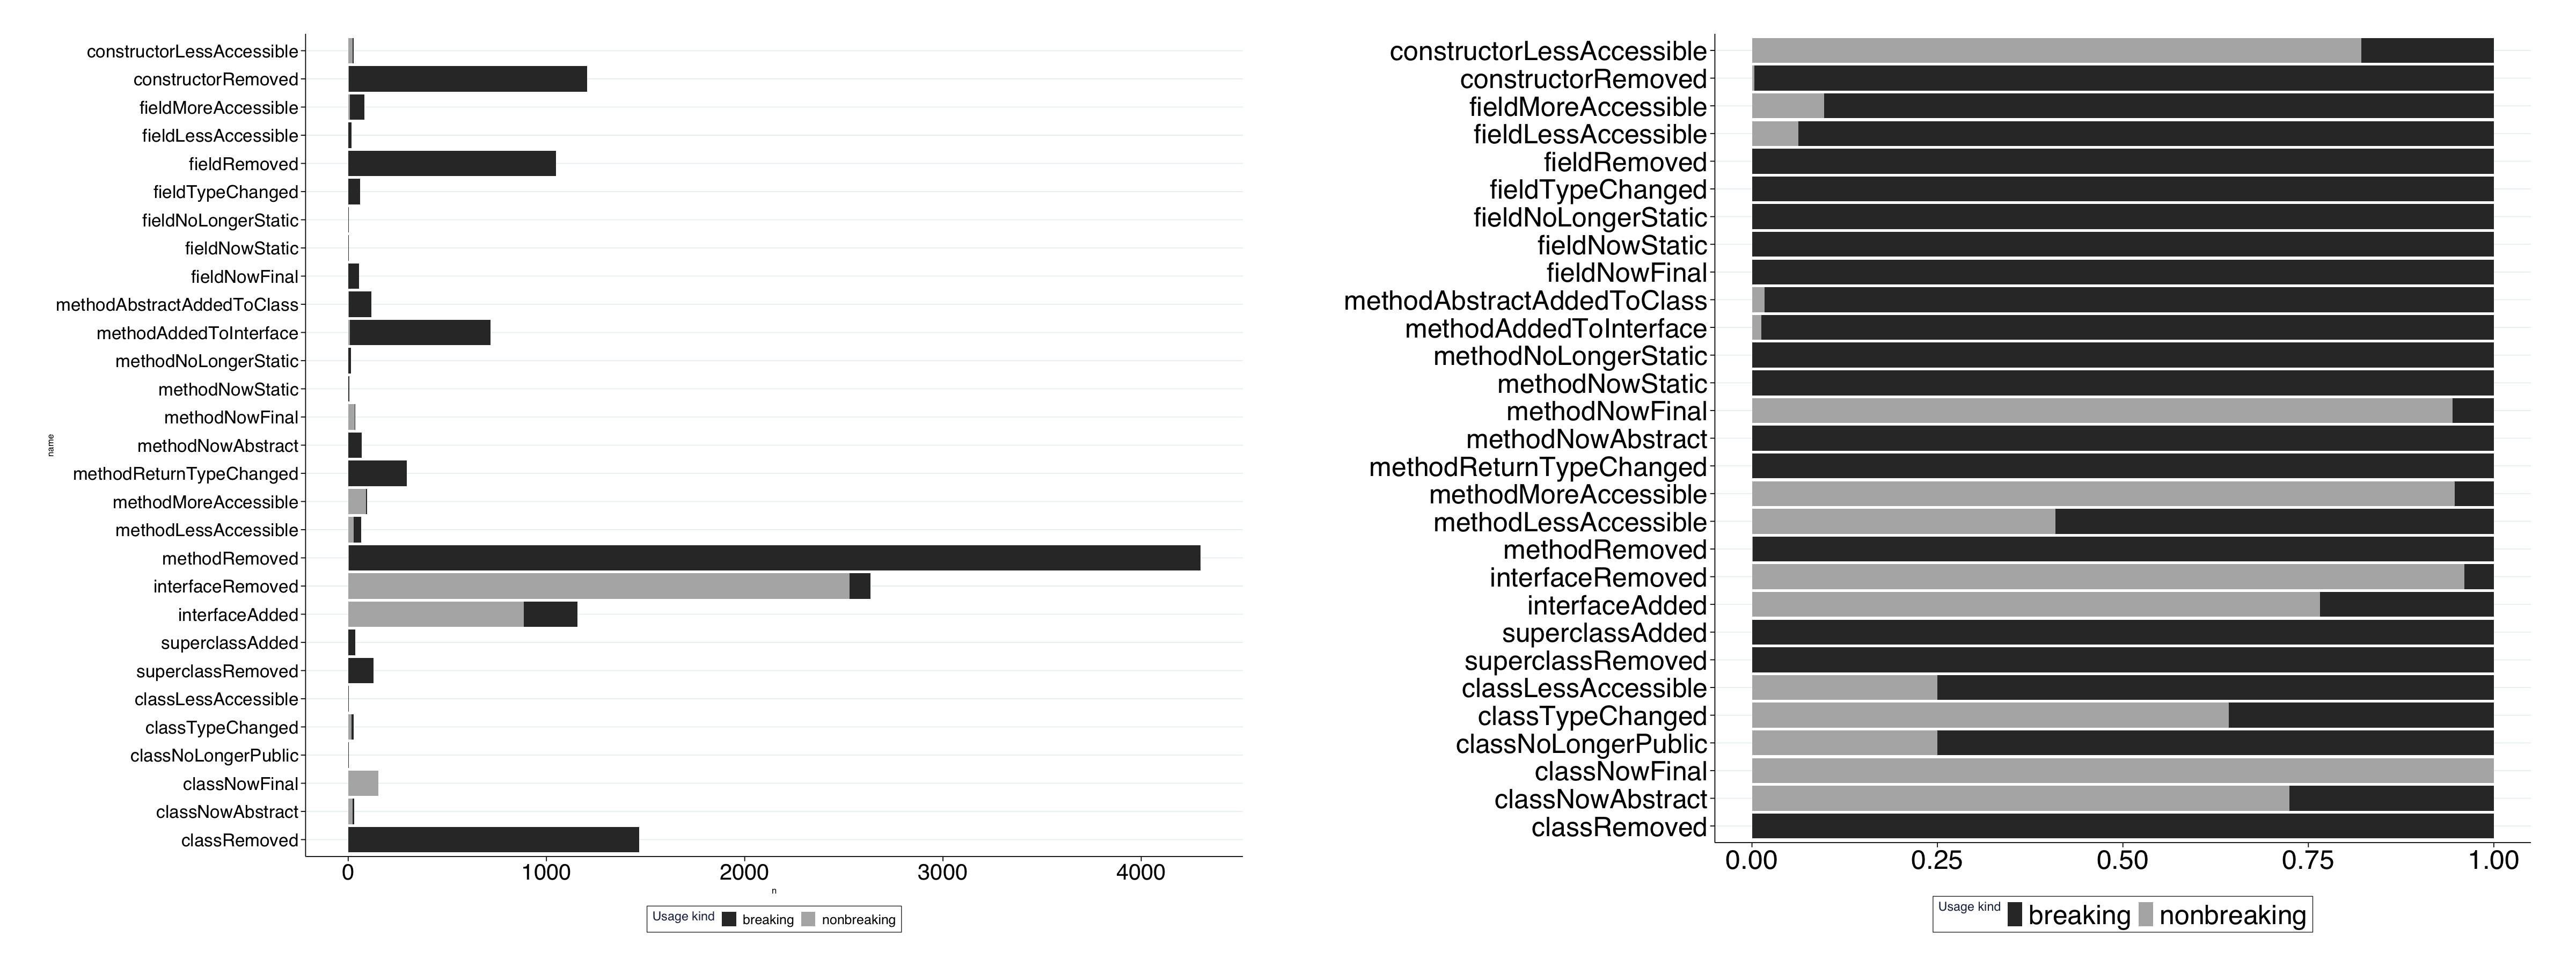

In [34]:
# Computing stats per BC type for breaking and non-breaking use types

# Removing:
# - methodNowThrowsCheckedException
# - classNowCheckedException
# - fieldStaticAndOverridesStatic
# - methodAbstractAddedInSuperclass
# - methodAbstractAddedInImplementedInterface
# - methodLessAccessibleThanInSuperclass
# - fieldLessAccessibleThanInSuperclass
# - fieldRemovedInSuperclass
# - methodRemovedInSuperclass
# - superclassModifiedIncompatible
# - methodIsStaticAndOverridesNotStatic
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

barstats <- data.frame(
    name = factor(),
    type = factor(),
    n = numeric()
)

for (bc in bcs) {
    t  <- sum(allDs[[paste(bc, "", sep="")]])
    s  <- sum(allDs[[paste(bc, "_stable", sep="")]])
    un <- sum(allDs[[paste(bc, "_unstable", sep="")]])
    u  <- sum(allDs[[paste(bc, "_unused", sep="")]])
    b  <- sum(allDs[[paste(bc, "_breaking", sep="")]])
    nb <- sum(allDs[[paste(bc, "_nonbreaking", sep="")]])
    c  <- sum(allDs[[paste(bc, "_changed", sep="")]])

    if (u + b + nb > 0) { # superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass should be filtered out
        barstats <- rbind(barstats, data.frame(name = bc, type = "breaking", n = b))
        barstats <- rbind(barstats, data.frame(name = bc, type = "nonbreaking", n = nb))
    } else { print(sprintf("%s",bc)) }
    
    nChanged <- nrow(subset(allDs, allDs[[paste(bc, "_changed", sep="")]] > 0))
    nBroken  <- nrow(subset(allDs, allDs[[paste(bc, "_breaking", sep="")]] > 0))
}

bplot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    geom_bar(position="stack", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70")) +
    theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=20), 
          legend.text = element_text(size = 15), plot.background = element_rect(fill = "white"))

splot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    labs(x="", y="") +
    geom_bar(position="fill", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70")) +
    theme(axis.text.x = element_text(size=30), axis.text.y = element_text(size=30), 
          legend.text = element_text(size=30), plot.background = element_rect(fill = "white"),
          plot.title = element_text(size=30, hjust=0, color="black"))

options(repr.plot.width=40, repr.plot.height=15)
grid.arrange(bplot, splot, ncol=2, nrow=1)

ggsave("figures/mdd-bcs-used-impact.pdf", splot, width=20, height=18)

---

## Hypotheses Testing

### Usage Ratios and Totals

In [35]:
# Compute usage ratios and totals
compute_accums <- function(ds) {
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", "classNowCheckedException", "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", "methodNowThrowsCheckedException", "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

    # Initialize vector
    breaking <- rep(0, nrow(ds))
    nonbreaking <- rep(0, nrow(ds))
    unused <- rep(0, nrow(ds))
    changed <- rep(0, nrow(ds))

    # Add cases from all BCs
    for (bc in bcs) {
        breaking <- breaking + ds[[paste(bc, "_breaking", sep="")]]
        nonbreaking <- nonbreaking + ds[[paste(bc, "_nonbreaking", sep="")]]
        unused <- unused + ds[[paste(bc, "_unused", sep="")]]
        changed <- changed + ds[[paste(bc, "_changed", sep="")]]
    }
    
    ds$num_changed <- changed
    ds$num_breaking <- breaking
    ds$num_nonbreaking <- nonbreaking
    ds$num_unused <- unused
    ds$num_used <- breaking + nonbreaking
    ds$ratio_breaking <- ifelse(ds$num_changed != 0, ds$num_breaking / ds$num_changed, 0) 
    ds$ratio_used_breaking <- ifelse(ds$num_used != 0, ds$num_breaking / ds$num_used, 0)
    ds$ratio_used_nonbreaking <- ifelse(ds$num_used != 0, ds$num_nonbreaking / ds$num_used, 0) 
    
    return (ds)
}

In [36]:
# Extract vectors per level
majorDs <- compute_accums(majorDs)
minorDs <- compute_accums(minorDs)
patchDs <- compute_accums(patchDs)
devDs <- compute_accums(devDs)
allDs <- compute_accums(allDs)

### Usage Summary

In [37]:
summary(majorDs$ratio_used_breaking)
summary(majorDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08741 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2015  0.1203  1.0000 

In [38]:
summary(minorDs$ratio_used_breaking)
summary(minorDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09393 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1118  0.0000  1.0000 

In [39]:
summary(patchDs$ratio_used_breaking)
summary(patchDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05308 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06153 0.00000 1.00000 

In [40]:
summary(devDs$ratio_used_breaking)
summary(devDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1527  0.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.163   0.000   1.000 

In [41]:
summary(allDs$ratio_used_breaking)
summary(allDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.07752 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09719 0.00000 1.00000 

### Hypothesis Tests

In [42]:
# Function to reject a test
reject_null_h <- function(p_value) {
    return (p_value < alpha)
}

#### Broken Clients: Pearson's $X^2$ Test

We use the Pearson's $X^2$ test to check if the proportion of broken clients is significantly different among the four semver levels. The Pearson's $X^2$ test is a non-parmetric test that does not assume normality.

**H$_0$:** The proportion of broken clients is the same across each semver level of library upgrades.

In [43]:
h_0 = "the proportion of broken clients is the same across each semver level of library upgrades"

In [44]:
# Set test alpha
alpha = 0.01

In [45]:
# Chi squuare test results
brokenTable <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
                        
dimnames(brokenTable) <- list(level=c("Major","Minor","Patch","Dev"), state=c("Not broken","Broken"))

test <- chisq.test(brokenTable)
print(test)


	Pearson's Chi-squared test

data:  brokenTable
X-squared = 322.89, df = 3, p-value < 2.2e-16



In [46]:
# Conclusion
reject = reject_null_h(test$p.value)
noquote(sprintf('Reject null hypothesis (i.e. %s)? %s', h_0, ifelse(reject, 'Yes', 'No')))

[1] Reject null hypothesis (i.e. the proportion of broken clients is the same across each semver level of library upgrades)? Yes

#### Broken Clients: Fisher’s Exact Tests

We use Fisher's exact test to compare independent pairs of semver levels. We also need to adjust the resulting p-values using the Holm-Bonferroni correction.

**H$_0$:** The proportion of broken clients is the same between the two semver levels.

In [47]:
h_0 = "the proportion of broken clients is the same between the two semver levels"

In [48]:
print("Major vs minor")
major_minor_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs))
))
dimnames(major_minor_table) <- list(level=c("Major","Minor"), state=c("Not broken","Broken"))
(major_minor_test <- fisher.test(major_minor_table))

print("Major vs patch")
major_patch_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs))
))
dimnames(major_patch_table) <- list(level=c("Major","Patch"), state=c("Not broken","Broken"))
(major_patch_test <- fisher.test(major_patch_table))

print("Major vs dev")
major_dev_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(major_dev_table) <- list(level=c("Major","Dev"), state=c("Not broken","Broken"))
(major_dev_test <- fisher.test(major_dev_table))

print("Minor vs patch")
minor_patch_table <- as.table(rbind(
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs))
))
dimnames(minor_patch_table) <- list(level=c("Minor","Patch"), state=c("Not broken","Broken"))
(minor_patch_test <- fisher.test(minor_patch_table))

print("Minor vs dev")
minor_dev_table <- as.table(rbind(
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(minor_dev_table) <- list(level=c("Minor","Dev"), state=c("Not broken","Broken"))
(minor_dev_test <- fisher.test(minor_dev_table))

print("Patch vs dev")
patch_dev_table <- as.table(rbind(
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(patch_dev_table) <- list(level=c("Patch","Dev"), state=c("Not broken","Broken"))
(patch_dev_test <- fisher.test(patch_dev_table))

[1] "Major vs minor"



	Fisher's Exact Test for Count Data

data:  major_minor_table
p-value = 0.3162
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8090757 1.0725714
sample estimates:
odds ratio 
 0.9307075 


[1] "Major vs patch"



	Fisher's Exact Test for Count Data

data:  major_patch_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3816894 0.5171236
sample estimates:
odds ratio 
 0.4440216 


[1] "Major vs dev"



	Fisher's Exact Test for Count Data

data:  major_dev_table
p-value = 6.214e-07
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.302259 1.854941
sample estimates:
odds ratio 
   1.55419 


[1] "Minor vs patch"



	Fisher's Exact Test for Count Data

data:  minor_patch_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4249636 0.5351338
sample estimates:
odds ratio 
 0.4770621 


[1] "Minor vs dev"



	Fisher's Exact Test for Count Data

data:  minor_dev_table
p-value = 1.026e-11
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.441496 1.931462
sample estimates:
odds ratio 
  1.670057 


[1] "Patch vs dev"



	Fisher's Exact Test for Count Data

data:  patch_dev_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.990483 4.092542
sample estimates:
odds ratio 
  3.500501 


In [49]:
# Perform Holm-Bonferroni correction
print("Raw p-values")
p_values <- c(major_minor_test$p.value, major_patch_test$p.value, major_dev_test$p.value, minor_patch_test$p.value, minor_dev_test$p.value, patch_dev_test$p.value)
names(p_values) <- c("Major vs minor", "Major vs patch", "Major vs dev", "Minor vs patch", "Minor vs dev", "Patch vs dev")
print(p_values)

print("Adjusted p-values")
p_values_adj <- p.adjust(p_values, method = "holm")
print(p_values_adj)

print("Rejects H0")
print(p_values_adj < alpha)

[1] "Raw p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  3.161751e-01   5.631293e-25   6.214344e-07   1.268422e-38   1.026365e-11 
  Patch vs dev 
  1.514247e-51 
[1] "Adjusted p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  3.161751e-01   2.252517e-24   1.242869e-06   6.342109e-38   3.079095e-11 
  Patch vs dev 
  9.085484e-51 
[1] "Rejects H0"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
         FALSE           TRUE           TRUE           TRUE           TRUE 
  Patch vs dev 
          TRUE 


#### Number of Detections: Kruskal-Wallis Test

We use the Kruskal-Wallis test to check if the four semver groups are significantly different from each other. Kruskal-Wallis is a non-parametric test that does not assume normality (opposed to ANOVA) and allows the comparison of more than two groups (opposed to Mann–Whitney U).

**H<sub>0</sub>:** The number of broken declarations is the same across each semver level of library upgrades.

In [50]:
h_0 = "the number of broken declarations is the same across each semver level of library upgrades"

In [51]:
# Set test alpha
alpha = 0.01

In [52]:
# Perform the Kruskal-Wallis test
kruskal <- kruskal.test(numDetections ~ level, data=semver_dt)
print(kruskal)

effect_size <- kruskal_effsize(semver_dt, numDetections ~ level)
print(effect_size)


	Kruskal-Wallis rank sum test

data:  numDetections by level
Kruskal-Wallis chi-squared = 29.237, df = 3, p-value = 1.997e-06



In [53]:
# Verify hypothesis
reject = reject_null_h(kruskal$p.value)
noquote(sprintf('Reject null hypothesis (i.e. %s)? %s', h_0, ifelse(reject, 'Yes', 'No')))

[1] Reject null hypothesis (i.e. the number of broken declarations is the same across each semver level of library upgrades)? Yes

#### Number of Detections: Mann-Whitney Tests

Now, we perform a two-tailed Mann-Whitney test (or two-sample Wilcoxon test) between all levels. This is done to differentiate between independent pairs. We also need to adjust the resulting p-values using the Holm-Bonferroni correction. In addition, we compute Cliff’s delta to assess the effect size and report the interpretation of its value using Cohen’s scale

**H<sub>0</sub>:** the number of broken declarations is the same between two semver levels.

In [54]:
# Extract vectors per level
dets_major <- subset(semver_dt, level == "MAJOR")$numDetections
dets_minor <- subset(semver_dt, level == "MINOR")$numDetections
dets_patch <- subset(semver_dt, level == "PATCH")$numDetections
dets_dev <- subset(semver_dt, level == "DEV")$numDetections

In [55]:
length(dets_major)
summary(dets_major)

[1] 309

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    5.00   41.75   15.00 2861.00 

In [56]:
length(dets_minor)
summary(dets_minor)

[1] 883

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   26.66   11.00 2812.00 

In [57]:
length(dets_patch)
summary(dets_patch)

[1] 514

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00   39.79   11.00 4309.00 

In [58]:
length(dets_dev)
summary(dets_dev)

[1] 300

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    6.00   34.47   17.25 1433.00 

In [59]:
# Compute MAJOR vs MINOR test
print("Major vs minor")
major_minor_test <- wilcox.test(dets_major, dets_minor)
print(major_minor_test)
effect_size <- cliff.delta(dets_major, dets_minor)
print(effect_size)

# Compute MAJOR vs PATCH test
print("Major vs patch")
major_patch_test <- wilcox.test(dets_major, dets_patch)
print(major_patch_test)
effect_size <- cliff.delta(dets_major, dets_patch)
print(effect_size)

# Compute MAJOR vs DEV test
print("Major vs dev")
major_dev_test <- wilcox.test(dets_major, dets_dev)
print(major_dev_test)
effect_size <- cliff.delta(dets_major, dets_dev)
print(effect_size)

# Compute MINOR vs PATCH test
print("Minor vs patch")
minor_patch_test <- wilcox.test(dets_minor, dets_patch)
print(minor_patch_test)
effect_size <- cliff.delta(dets_minor, dets_patch)
print(effect_size)

# Compute MINOR vs DEV test
print("Minor vs dev")
minor_dev_test <- wilcox.test(dets_minor, dets_dev)
print(minor_dev_test)
effect_size <- cliff.delta(dets_minor, dets_dev)
print(effect_size)

# Compute PATCH vs DEV test
patch_dev_test <- wilcox.test(dets_patch, dets_dev)
print(patch_dev_test)
effect_size <- cliff.delta(dets_patch, dets_dev)
print(effect_size)

[1] "Major vs minor"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_minor
W = 154930, p-value = 0.0003387
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: 0.1356475 (negligible)
95 percent confidence interval:
     lower      upper 
0.06207876 0.20775008 
[1] "Major vs patch"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_patch
W = 91746, p-value = 0.000164
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: 0.1553083 (small)
95 percent confidence interval:
     lower      upper 
0.07603434 0.23263126 
[1] "Major vs dev"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_dev
W = 45478, p-value = 0.6867
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: -0.01881338 (negligible)
95 percent confidence interval:
      lower       upper 
-0.10999994  0.07268724 
[1] 

In [60]:
# Perform Holm-Bonferroni correction
print("Raw p-values")
p_values <- c(major_minor_test$p.value, major_patch_test$p.value, major_dev_test$p.value, minor_patch_test$p.value, minor_dev_test$p.value, patch_dev_test$p.value)
names(p_values) <- c("Major vs minor", "Major vs patch", "Major vs dev", "Minor vs patch", "Minor vs dev", "Patch vs dev")
print(p_values)

print("Adjusted p-values")
p_values_adj <- p.adjust(p_values, method = "holm")
print(p_values_adj)

print(p_values_adj < alpha)

[1] "Raw p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  3.386684e-04   1.639592e-04   6.867494e-01   4.256053e-01   9.582442e-05 
  Patch vs dev 
  7.875854e-05 
[1] "Adjusted p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  0.0010160052   0.0006558367   0.8512105026   0.8512105026   0.0004791221 
  Patch vs dev 
  0.0004725512 
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
          TRUE           TRUE          FALSE          FALSE           TRUE 
  Patch vs dev 
          TRUE 


---

## EOF

> Lina Ochoa, Thomas Degueule, Jean-Rémy Falleri & Jurgen Vinju. Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central. Journal of Empirical Software Engineering, 2021.

This notebook—and all its content—is licensed under the [MIT License](https://choosealicense.com/licenses/mit/).   
© 2021 Maracas